In [200]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import missingno as msno

print('Packages successfully imported')
sns.set(color_codes=True)

/kaggle/input/data-analyst-jobs/DataAnalyst.csv
Packages successfully imported


In [201]:
df = pd.read_csv("/kaggle/input/data-analyst-jobs/DataAnalyst.csv")
df.info()
df.head()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

(2253, 16)

In [202]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace(r"[^a-zA-Z\d\_]+", "")   
df.columns = map(str.lower, df.columns)
df=df.replace(-1,np.nan)
df=df.replace(-1.0,np.nan)
df=df.replace('-1',np.nan)

In [203]:
cardinality ={}
for col in df.columns:
    cardinality[col] = df[col].nunique()
cardinality

{'unnamed_0': 2253,
 'job_title': 1272,
 'salary_estimate': 89,
 'job_description': 2253,
 'rating': 36,
 'company_name': 1513,
 'location': 253,
 'headquarters': 482,
 'size': 8,
 'founded': 160,
 'type_of_ownership': 14,
 'industry': 88,
 'sector': 24,
 'revenue': 13,
 'competitors': 290,
 'easy_apply': 1}

In [204]:
missing_percentage=df.isna().sum()*100/df.shape[0]
missing_percentage
df = df.drop(['easy_apply','competitors','type_of_ownership','headquarters','unnamed_0'],axis=1)
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,industry,sector,revenue
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,1961.0,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,1893.0,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",1001 to 5000 employees,2003.0,Internet,Information Technology,Unknown / Non-Applicable
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",201 to 500 employees,2002.0,IT Services,Information Technology,$50 to $100 million (USD)
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,2009.0,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)


In [205]:
df[['low', 'high']] = df['salary_estimate'].str.split().str.get(0).str.split("-", expand = True)
df['low']=df['low'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
df['high']=df['high'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
# df['high']=pd.cut(x=df['high'], bins=[0,10,20,30,40,50,60,70,80,90,100])
# df['low']=pd.cut(x=df['low'], bins=[0,10,20,30,40,50,60,70,80,90,100])
df[['city', 'state']] = df['location'].str.split(',', n=1, expand=True)
df['company_name'] = df['company_name'].str.split('\n').str.get(0)
df = df.drop(['salary_estimate'],axis=1)
df.head()

,job_title,job_description,rating,company_name,location,size,founded,industry,sector,revenue,low,high,city,state
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,1961.0,Social Assistance,Non-Profit,$100 to $500 million (USD),37,66,New York,NY
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,1893.0,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37,66,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY",1001 to 5000 employees,2003.0,Internet,Information Technology,Unknown / Non-Applicable,37,66,New York,NY
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY",201 to 500 employees,2002.0,IT Services,Information Technology,$50 to $100 million (USD),37,66,New York,NY
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",501 to 1000 employees,2009.0,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37,66,New York,NY


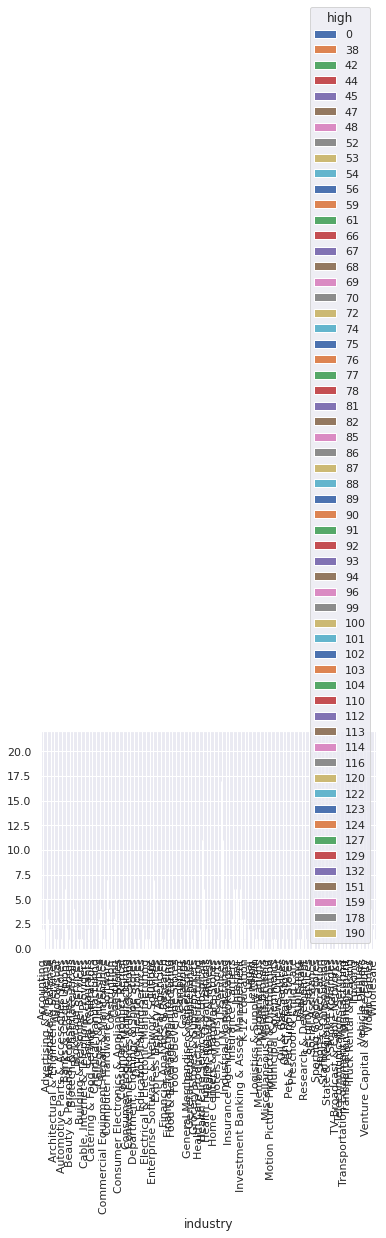

In [210]:
pd.crosstab(df['industry'],df['high']).plot.bar()

In [207]:
df['industry'].value_counts()

IT Services                         325
Staffing & Outsourcing              323
Health Care Services & Hospitals    151
Consulting                          111
Computer Hardware & Software        111
                                   ... 
Audiovisual                           1
Trucking                              1
Chemical Manufacturing                1
Truck Rental & Leasing                1
Consumer Product Rental               1
Name: industry, Length: 88, dtype: int64

In [ ]:
# sns.distplot(df['high'].value_counts(), bins=20);
groups = df.groupby(['industry']).size()[10:].nlargest(10)
groups.plot.bar()

In [209]:
df.sort_values(by=['high_binned'])

KeyError: 'high_binned'

In [ ]:
df.sort_values(by=['high_binned'])

In [ ]:
df.isnull().sum()
msno.matrix(df)

In [ ]:
# df['salary'] =  df['salary_estimate'].str.findall(r'\d[0-9\-]*')
# df['salary'] = df['salary'].apply(lambda x: '-'.join(map(str, x)))
# df.head()
